In [2]:
import pandas as pd
import numpy as np

In [3]:
# see heart-disease.names for attribute description
attr = ["age","sex","cp","trestbps",
        "chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca",
        "thal","num"]

In [4]:
# load datasets
cleve = pd.read_csv("../data/heart_disease/processed.cleveland.data", sep= ",", names=attr)
hung = pd.read_csv("../data/heart_disease/processed.hungarian.data", sep=",", names=attr)
swiss = pd.read_csv("../data/heart_disease/processed.switzerland.data", sep= ",", names=attr)
va = pd.read_csv("../data/heart_disease/processed.va.data", sep=",", names=attr)

In [5]:
# missing values should be denoted by -9.0 but seems to be replaced by '?'
# replace by None
cleve = cleve.replace(to_replace={'?': None, -9.0: None})
hung = hung.replace(to_replace={'?': None, -9.0: None})
swiss = swiss.replace(to_replace={'?': None, -9.0: None})
va = va.replace(to_replace={'?': None, -9.0: None})

In [6]:
# count missing values
cleve_miss = cleve.isnull().sum()
hung_miss = hung.isnull().sum()
swiss_miss = swiss.isnull().sum()
va_miss = va.isnull().sum()

miss = pd.concat([cleve_miss, hung_miss, swiss_miss, va_miss], axis=1, keys=["Cleveland data", "Hungarian data", 
                                                                            "Switzerland data", "V.A. Medical Center data"])

AxesSubplot(0.125,0.11;0.775x0.77)


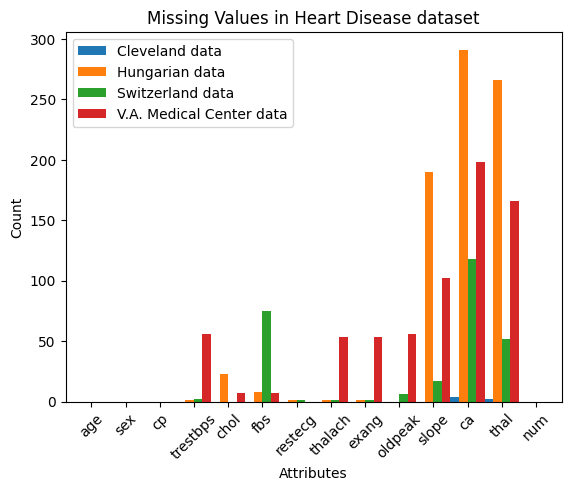

In [7]:
missplot = miss.plot.bar(rot=45, width=1, title='Missing Values in Heart Disease dataset', xlabel='Attributes', ylabel='Count')
print(missplot)

In [8]:
print(f'Ratio #Missing Vals/#Entries:\n\nCleveland: {sum(cleve_miss)/(cleve.shape[0]*cleve.shape[1])}\nHungarian: {sum(hung_miss)/(hung.shape[0]*hung.shape[1])}\nSwitzerland: {sum(swiss_miss)/(swiss.shape[0]*swiss.shape[1])}\nV.A.: {sum(va_miss)/(va.shape[0]*va.shape[1])}')

Ratio #Missing Vals/#Entries:

Cleveland: 0.0014144271570014145
Hungarian: 0.18999028182701652
Switzerland: 0.15853658536585366
V.A.: 0.24928571428571428


Attribute Information:
      **-- 1. #3  (age)**       
      **-- 2. #4  (sex) - (1 = male; 0 = female)**       
      **-- 3. #9  (cp) - chest pain type**
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic  
      **-- 4. #10 (trestbps) - resting blood pressure (in mm Hg)**
      -- 5. #12 (chol) - serum cholestoral in mg/dl
      -- 6. #16 (fbs) - fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
      -- 7. #19 (restecg)  - resting electrocardiographic results
      **-- 8. #32 (thalach) - maximum heart rate achieved**
      **-- 9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)**
      -- 10. #40 (oldpeak)  - ST depression induced by exercise relative to rest
      -- 11. #41 (slope) - the slope of the peak exercise ST segment    
      -- 12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
      -- 13. #51 (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
      **-- 14. #58 (num) - (predicted) diagnosis of heart disease (angiographic disease status)**
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

Not marked attributes are too specific. Marked attributes potentially need **imputation** on missing values.

First comparisons between male and female could be:
  - is any gender more often diagnosed with heart disease ? (num, val 1)
  - How does symptoms differ between male and female within positively diagnosed subgroups?
    - resting blood pressure (trestpbs)
    - max heart rate (thalach)
    - exercise induces angina (exang)

In [21]:
heartdisease = pd.concat([cleve, hung, swiss, va], axis=0, ignore_index=True)
heartdisease.to_csv('../data/heart_disease/heart_disease_combined.csv')